# Imports

In [1]:
import sys
sys.path.append("../src")

# Librairies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# SKlearn
from sklearn.tree import DecisionTreeClassifier 
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score

# Matplotlib
import matplotlib.pyplot as plt

# Our code
from generate_prediction import load_dataset, features_expert

# Constants

In [2]:
train_path = "../data/normalized_train.csv"

# Loading data

In [3]:
features = features_expert()
X, y = load_dataset(train_path, training=True, features=features)

# Testing Decision Trees

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
clf    = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy=", accuracy_score(y_test, y_pred))

Accuracy= 1.0


In [5]:
from sklearn.model_selection import cross_val_score
num_splits = 5 
accs = []
clf = DecisionTreeClassifier()
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

0.7466666666666667

[Text(200.88000000000002, 181.2, 'X[20] <= 6.717\ngini = 0.666\nsamples = 29\nvalue = [9, 10, 10]'),
 Text(133.92000000000002, 108.72, 'X[44] <= 6.508\ngini = 0.499\nsamples = 19\nvalue = [9, 0, 10]'),
 Text(66.96000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 9\nvalue = [9, 0, 0]'),
 Text(200.88000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 10\nvalue = [0, 0, 10]'),
 Text(267.84000000000003, 108.72, 'gini = 0.0\nsamples = 10\nvalue = [0, 10, 0]')]

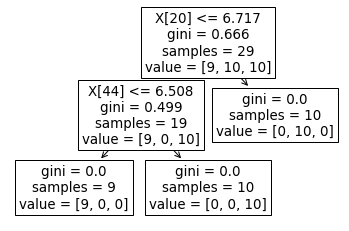

In [6]:
from sklearn import tree
tree.plot_tree(clf.fit(X, y)) 

In [7]:
from sklearn.model_selection import cross_validate
num_splits = 5 
scoring = ['accuracy', 'f1_macro']
clf = DecisionTreeClassifier()
scores = cross_validate(clf, X, y, cv=5, scoring=scoring)
for key in scores:
    print(key+' : '+str(scores[key].mean()))

fit_time : 0.0007164955139160156
score_time : 0.0011262893676757812
test_accuracy : 0.72
test_f1_macro : 0.7177777777777778
